In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
merge_random   = pd.read_csv("merge_random.csv")
merge_reversed = pd.read_csv("merge_reversed.csv")
merge_nearly   = pd.read_csv("merge_nearly.csv")

hybrid_random   = pd.read_csv("hybrid_random.csv")
hybrid_reversed = pd.read_csv("hybrid_reversed.csv")
hybrid_nearly   = pd.read_csv("hybrid_nearly.csv")

**Графики для стандартного MERGE SORT**

In [12]:
def plot_merge_all():
    # 1) случайные массивы
    plt.figure(figsize=(8, 5))
    plt.plot(merge_random["n"], merge_random["time_us"])
    plt.xlabel("Размер массива n")
    plt.ylabel("Время, мкс")
    plt.title("Merge sort: случайные массивы")
    plt.grid(True)
    plt.show()

    # 2) обратно отсортированные
    plt.figure(figsize=(8, 5))
    plt.plot(merge_reversed["n"], merge_reversed["time_us"])
    plt.xlabel("Размер массива n")
    plt.ylabel("Время, мкс")
    plt.title("Merge sort: обратно отсортированные массивы")
    plt.grid(True)
    plt.show()

    # 3) почти отсортированные
    plt.figure(figsize=(8, 5))
    plt.plot(merge_nearly["n"], merge_nearly["time_us"])
    plt.xlabel("Размер массива n")
    plt.ylabel("Время, мкс")
    plt.title("Merge sort: почти отсортированные массивы")
    plt.grid(True)
    plt.show()

Графики для стандартного MERGE SORT


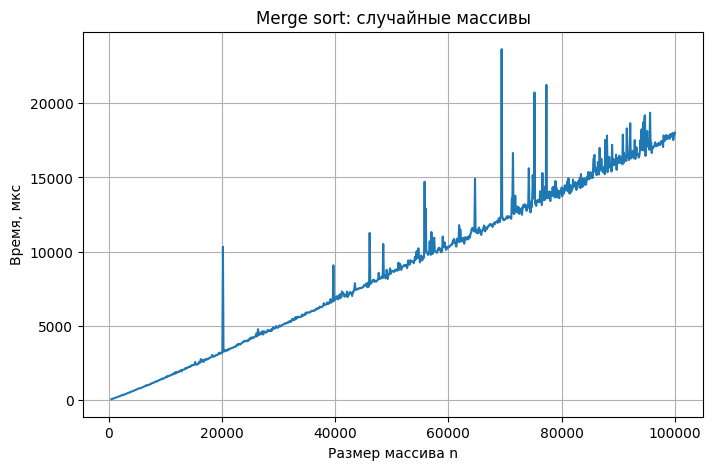

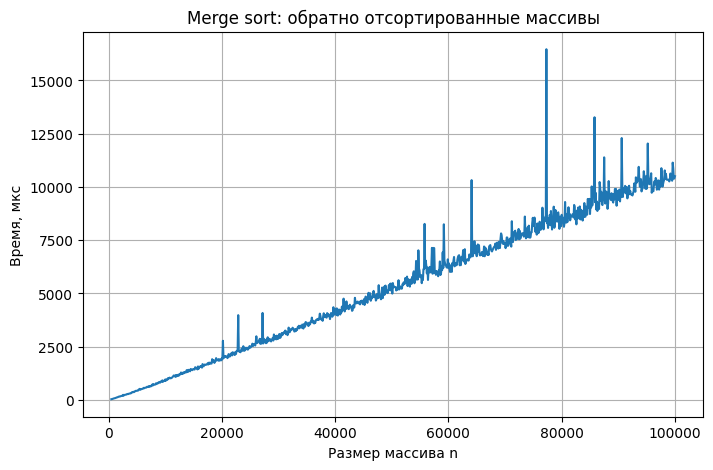

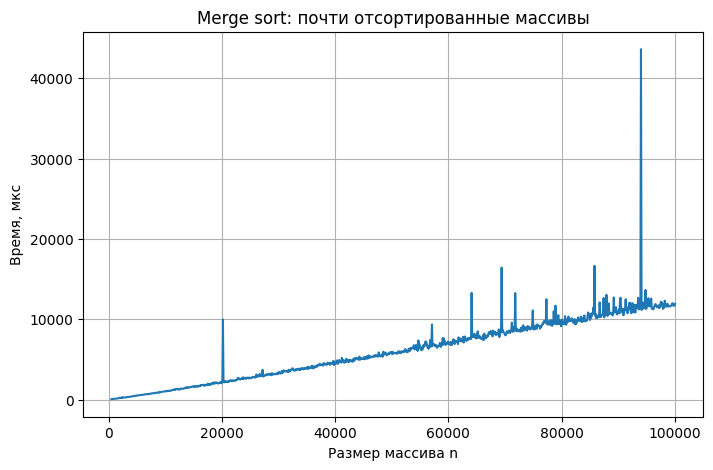

In [16]:
print("Графики для стандартного MERGE SORT")
plot_merge_all()

**Графики для гибридного алгоритма**

In [13]:
def plot_hybrid_all():
    # вспомогательная функция
    def plot_one(df, title):
        plt.figure(figsize=(8, 5))
        for col in df.columns:
            if col == "n":
                continue
            plt.plot(df["n"], df[col], label=col)
        plt.xlabel("Размер массива n")
        plt.ylabel("Время, мкс")
        plt.title(title)
        plt.legend(title="Колонка (порог)")
        plt.grid(True)
        plt.show()

    # 1) случайные массивы
    plot_one(hybrid_random, "Hybrid merge+insertion: случайные массивы")

    # 2) обратно отсортированные
    plot_one(hybrid_reversed, "Hybrid merge+insertion: обратно отсортированные массивы")

    # 3) почти отсортированные
    plot_one(hybrid_nearly, "Hybrid merge+insertion: почти отсортированные массивы")


Графики для гибридного MERGE+INSERTION SORT


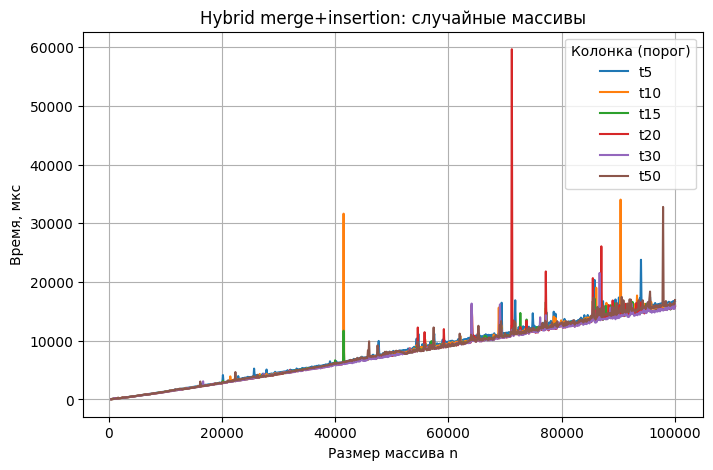

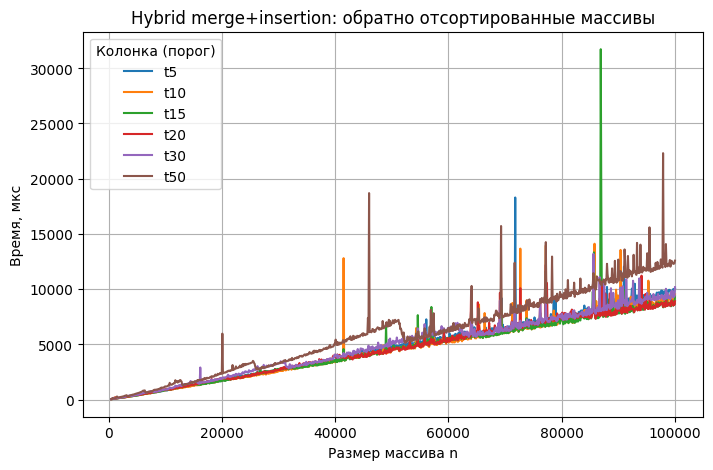

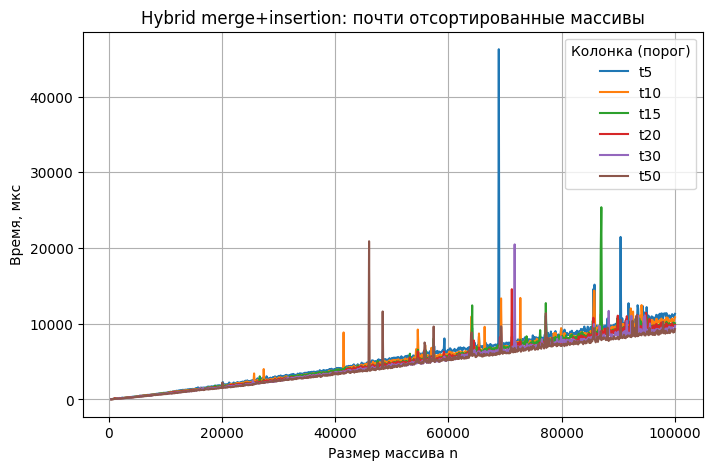

In [17]:

print("Графики для гибридного MERGE+INSERTION SORT")
plot_hybrid_all()


**Сравнение merge sort и гибридного для заданного порога**

In [14]:
def plot_compare_all(threshold_column="t15"):
    """
    Рисует 3 графика:
    1) random: merge vs hybrid(threshold_column)
    2) reversed: merge vs hybrid(threshold_column)
    3) nearly: merge vs hybrid(threshold_column)
    """

    # 1) случайные массивы
    plt.figure(figsize=(8, 5))
    plt.plot(merge_random["n"], merge_random["time_us"], label="merge sort")
    plt.plot(hybrid_random["n"], hybrid_random[threshold_column], label=f"hybrid ({threshold_column})")
    plt.xlabel("Размер массива n")
    plt.ylabel("Время, мкс")
    plt.title(f"Merge vs hybrid ({threshold_column}): случайные массивы")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2) обратно отсортированные
    plt.figure(figsize=(8, 5))
    plt.plot(merge_reversed["n"], merge_reversed["time_us"], label="merge sort")
    plt.plot(hybrid_reversed["n"], hybrid_reversed[threshold_column], label=f"hybrid ({threshold_column})")
    plt.xlabel("Размер массива n")
    plt.ylabel("Время, мкс")
    plt.title(f"Merge vs hybrid ({threshold_column}): обратно отсортированные массивы")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3) почти отсортированные
    plt.figure(figsize=(8, 5))
    plt.plot(merge_nearly["n"], merge_nearly["time_us"], label="merge sort")
    plt.plot(hybrid_nearly["n"], hybrid_nearly[threshold_column], label=f"hybrid ({threshold_column})")
    plt.xlabel("Размер массива n")
    plt.ylabel("Время, мкс")
    plt.title(f"Merge vs hybrid ({threshold_column}): почти отсортированные массивы")
    plt.legend()
    plt.grid(True)
    plt.show()

Сравнение MERGE и гибридного (порог t15)


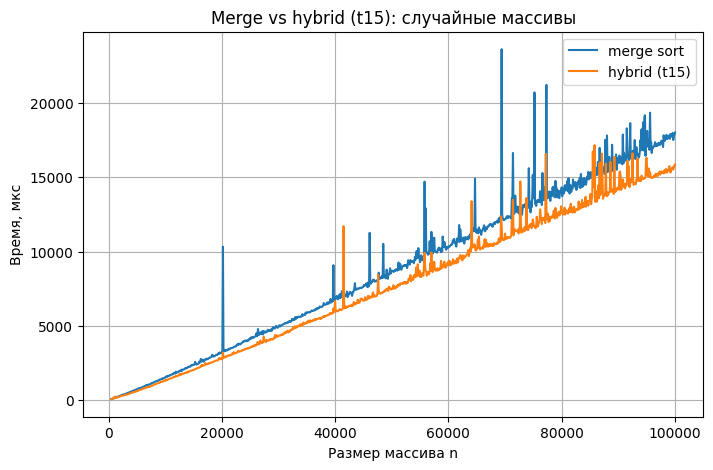

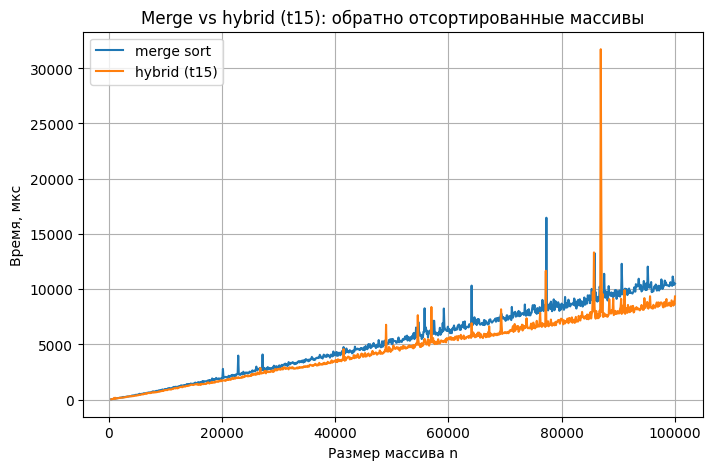

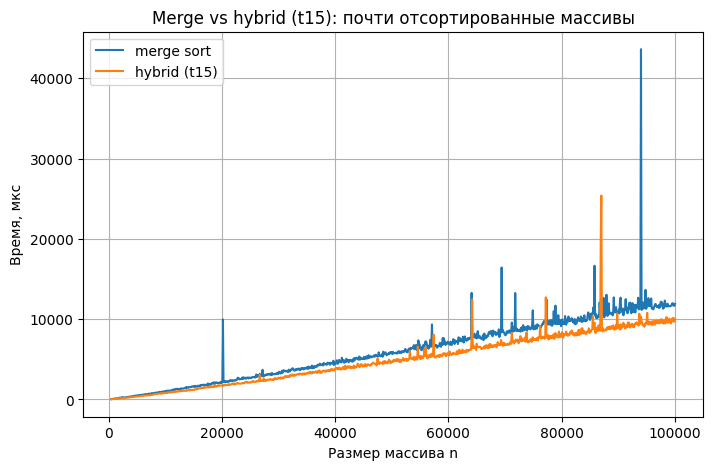

In [18]:
print("Сравнение MERGE и гибридного (порог t15)")
plot_compare_all(threshold_column="t15")

**Графики ускорения (speedup = Tmerge/Th)**

In [15]:
def plot_speedup_all(threshold_column="t15"):
    """
    Рисует 3 графика ускорения:
    speedup(n) = T_merge(n) / T_hybrid(n)
    для трёх типов массивов.
    """

    # 1) случайные массивы
    speedup_random = merge_random["time_us"] / hybrid_random[threshold_column]
    plt.figure(figsize=(8, 5))
    plt.plot(merge_random["n"], speedup_random)
    plt.xlabel("Размер массива n")
    plt.ylabel("Ускорение (T_merge / T_hybrid)")
    plt.title(f"Ускорение hybrid ({threshold_column}) относительно merge: случайные массивы")
    plt.grid(True)
    plt.show()

    # 2) обратно отсортированные массивы
    speedup_reversed = merge_reversed["time_us"] / hybrid_reversed[threshold_column]
    plt.figure(figsize=(8, 5))
    plt.plot(merge_reversed["n"], speedup_reversed)
    plt.xlabel("Размер массива n")
    plt.ylabel("Ускорение (T_merge / T_hybrid)")
    plt.title(f"Ускорение hybrid ({threshold_column}) относительно merge: обратно отсортированные массивы")
    plt.grid(True)
    plt.show()

    # 3) почти отсортированные массивы
    speedup_nearly = merge_nearly["time_us"] / hybrid_nearly[threshold_column]
    plt.figure(figsize=(8, 5))
    plt.plot(merge_nearly["n"], speedup_nearly)
    plt.xlabel("Размер массива n")
    plt.ylabel("Ускорение (T_merge / T_hybrid)")
    plt.title(f"Ускорение hybrid ({threshold_column}) относительно merge: почти отсортированные массивы")
    plt.grid(True)
    plt.show()

Графики ускорения (speedup) для порога t15


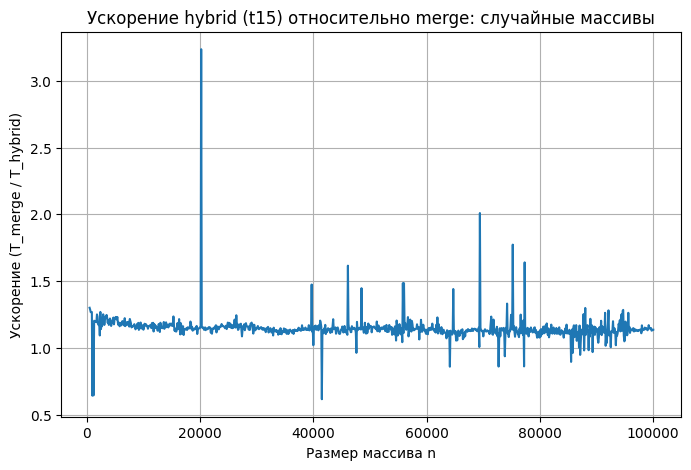

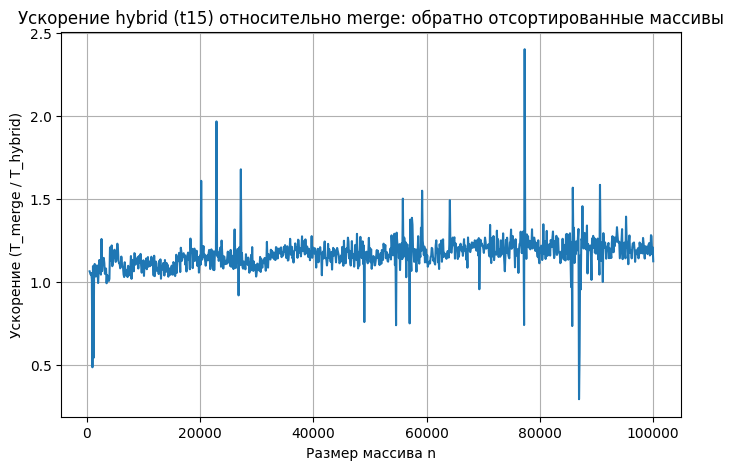

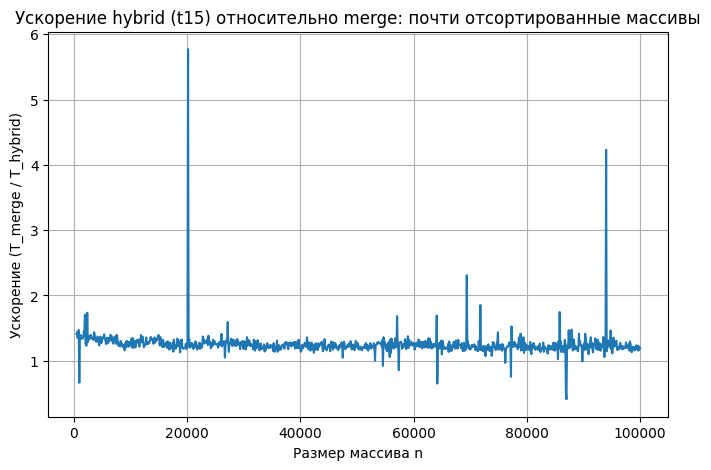

In [19]:
print("Графики ускорения (speedup) для порога t15")
plot_speedup_all(threshold_column="t15")